In [1]:
pwd

u'C:\\Users\\jeana\\Documents\\GA final project'

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import statsmodels.api as sm

### Problem Statement 1:
Using the Freddie Mac loan level origination datasets of randomly selected single-family mortgage loans for each origination year: We will explore different origination trends pre and post the financial crisis.  

We use loans originated in 2006 to represent pre-crisis and loans originated 2014 to represent post-crisis

### Step 1:  pull in the 2006 and 2014 datasets, merge, clean and choose a subset of loans and relevant variables

In [3]:
#pull in 2006 data; add column headers to dataset, organize so loan ID is the index
header_orig=['fico','first_pay_date','first_time_homebuyer','mature_date','msa','mi_pct','units','occupancy','cltv','dti','orig_bal','ltv','init_rate','channel','prepay','product','state','prop_type','prop_zip','loan_id','purpose','orig_term','num_borrowers','seller','servicer','super_conforming']
df_2006_O = pd.read_csv('sample_orig_2006.txt',sep='|',names=header_orig, index_col='loan_id')

In [4]:
#we then add an orig yr column to mark the loans in this dataset as 2006 origination
df_2006_O['orig_yr']=2006

In [5]:
df_2006_O.head()

,fico,first_pay_date,first_time_homebuyer,mature_date,msa,mi_pct,units,occupancy,cltv,dti,...,state,prop_type,prop_zip,purpose,orig_term,num_borrowers,seller,servicer,super_conforming,orig_yr
loan_id,,,,,,,,,,,,,,,,,,,,,
F106Q1000086,790,200603,N,203602,NaN,0,1,O,80.0,27,...,KY,SF,40300,C,360,2.0,Other sellers,USBANKNA,NaN,2006
F106Q1000096,755,200603,N,203602,NaN,30,1,O,95.0,52,...,OK,SF,74500,P,360,2.0,Other sellers,Other servicers,NaN,2006
F106Q1000105,660,200603,NaN,203602,28740.0,0,1,O,37.0,40,...,NY,SF,12500,C,360,1.0,Other sellers,Other servicers,NaN,2006
F106Q1000192,714,200603,N,203602,45820.0,0,1,O,64.0,23,...,KS,SF,66400,P,360,1.0,Other sellers,Other servicers,NaN,2006
F106Q1000240,687,200603,N,203602,NaN,0,1,O,61.0,46,...,NC,SF,27200,C,360,1.0,Other sellers,USBANKNA,NaN,2006


In [6]:
#pull in 2014 data; add column headers to dataset, organize so loan ID is the index
header_orig=['fico','first_pay_date','first_time_homebuyer','mature_date','msa','mi_pct','units','occupancy','cltv','dti','orig_bal','ltv','init_rate','channel','prepay','product','state','prop_type','prop_zip','loan_id','purpose','orig_term','num_borrowers','seller','servicer','super_conforming']
df_2014_O = pd.read_csv('sample_orig_2014.txt',sep='|',names=header_orig, index_col='loan_id')


C:\Users\jeana\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
#we then add an orig yr column to mark these loans as 2014 origination
df_2014_O['orig_yr']=2014

In [8]:
df_2014_O.head()

,fico,first_pay_date,first_time_homebuyer,mature_date,msa,mi_pct,units,occupancy,cltv,dti,...,state,prop_type,prop_zip,purpose,orig_term,num_borrowers,seller,servicer,super_conforming,orig_yr
loan_id,,,,,,,,,,,,,,,,,,,,,
F114Q1000005,725,201403,NaN,204402,17860.0,0,1,O,80.0,20,...,MO,SF,65200,N,360,2,Other sellers,"PNCBANK,NATL",NaN,2014
F114Q1000031,780,201403,NaN,204402,30700.0,0,1,O,80.0,44,...,NE,PU,68500,N,360,2,Other sellers,Other servicers,NaN,2014
F114Q1000037,661,201405,N,204404,39580.0,0,1,O,80.0,22,...,NC,SF,27600,P,360,1,Other sellers,NATIONSTARMTGELLC,NaN,2014
F114Q1000058,745,201404,NaN,204403,10580.0,0,1,O,43.0,16,...,NY,SF,12000,C,360,2,Other sellers,Other servicers,NaN,2014
F114Q1000068,781,201403,N,204402,43580.0,0,1,O,80.0,14,...,IA,SF,51100,P,360,2,Other sellers,Other servicers,NaN,2014


In [9]:
print df_2006_O.shape
# our 2006 data has 50,000 rows and 26 features
print df_2006_O.count()
# we see most columns are fully populated; even ones that arent are close and a blank entry is ok.  
# super conforming is not populated because this product was introduced in 2009 

(50000, 26)
fico                    50000
first_pay_date          50000
first_time_homebuyer    45414
mature_date             50000
msa                     41791
mi_pct                  50000
units                   50000
occupancy               50000
cltv                    49999
dti                     49955
orig_bal                50000
ltv                     49999
init_rate               50000
channel                 50000
prepay                  49935
product                 50000
state                   50000
prop_type               50000
prop_zip                50000
purpose                 50000
orig_term               50000
num_borrowers           49983
seller                  50000
servicer                50000
super_conforming            0
orig_yr                 50000
dtype: int64


In [10]:
print df_2014_O.shape
# our data also has 50,000 rows and 26 features
print df_2014_O.count()
# we see most columns are fully populated except for:
#  1) first time homebuyer, which we will consequently drop 
#  2) super conforming, which we leave in because the emergence of super conf. loans is a noteable post crisis trend 
# the rest are close to being fully populated and a blank entry here is ok.  

(50000, 26)
fico                    50000
first_pay_date          50000
first_time_homebuyer    25607
mature_date             50000
msa                     44970
mi_pct                  50000
units                   50000
occupancy               50000
cltv                    49999
dti                     50000
orig_bal                50000
ltv                     49999
init_rate               50000
channel                 50000
prepay                  49988
product                 50000
state                   50000
prop_type               50000
prop_zip                50000
purpose                 50000
orig_term               50000
num_borrowers           50000
seller                  50000
servicer                50000
super_conforming         1995
orig_yr                 50000
dtype: int64


In [11]:
#combine 2006 and 2014 data into one dataset:  orig_data.  Then check using .sample()
orig_data=df_2006_O.append(df_2014_O)
orig_data.sample(10)


,fico,first_pay_date,first_time_homebuyer,mature_date,msa,mi_pct,units,occupancy,cltv,dti,...,state,prop_type,prop_zip,purpose,orig_term,num_borrowers,seller,servicer,super_conforming,orig_yr
loan_id,,,,,,,,,,,,,,,,,,,,,
F114Q4104627,794,201412,Y,204411,45104.0,30,1,O,95.0,38,...,WA,SF,98300,P,360,1.0,"BANKOFAMERICA,NA","BANKOFAMERICA,NA",NaN,2014
F106Q4169851,721,200701,Y,203612,30780.0,25,1,O,95.0,18,...,AR,SF,72000,P,360,2.0,"WELLSFARGOBANK,NA","WELLSFARGOBANK,NA",NaN,2006
F114Q4049251,810,201412,N,202911,31020.0,0,1,O,80.0,22,...,WA,PU,98600,P,180,2.0,"BANKOFAMERICA,NA","BANKOFAMERICA,NA",NaN,2014
F114Q4152014,778,201501,NaN,202912,26420.0,0,1,O,48.0,39,...,TX,SF,77000,C,180,1.0,"CALIBERHOMELOANS,INC","CALIBERHOMELOANS,INC",NaN,2014
F114Q4109278,806,201501,Y,204412,24020.0,30,1,O,95.0,43,...,NY,SF,12800,P,360,2.0,Other sellers,Other servicers,NaN,2014
F106Q1026928,753,200603,N,203602,17140.0,0,1,O,100.0,29,...,OH,SF,45000,P,360,2.0,"ABNAMROMTGEGROUP,INC","CITIMORTGAGE,INC",NaN,2006
F106Q3010216,746,200609,N,203608,47260.0,0,1,O,80.0,22,...,VA,SF,23500,C,360,2.0,CHASEHOMEFINANCELLC,"JPMORGANCHASEBANK,NA",NaN,2006
F114Q2177560,702,201407,NaN,204406,38060.0,0,1,O,80.0,30,...,AZ,PU,85200,C,360,2.0,"WELLSFARGOBANK,NA","WELLSFARGOBANK,NA",NaN,2014
F114Q4185169,791,201501,Y,204412,35004.0,0,1,O,80.0,30,...,NY,SF,11500,P,360,1.0,"WELLSFARGOBANK,NA","WELLSFARGOBANK,NA",NaN,2014


In [12]:
#to see size of our data
orig_data.shape

(100000, 26)

In [13]:
# Our merged dataset has 100,000 rows and 26 columns.  
# We filter the data to look at only: 30 year fixed rate loans on 1-unit single family homes with no prepay penalty
orig_subset=orig_data.loc[orig_data['orig_term']==360]
orig_subset=orig_subset.loc[orig_subset['units']==1]
orig_subset=orig_subset.loc[orig_subset['product']=='FRM']
orig_subset=orig_subset.loc[orig_subset['prop_type']=='SF']
orig_subset=orig_subset.loc[orig_subset['prepay']=='N']

orig_subset.sample(10)


,fico,first_pay_date,first_time_homebuyer,mature_date,msa,mi_pct,units,occupancy,cltv,dti,...,state,prop_type,prop_zip,purpose,orig_term,num_borrowers,seller,servicer,super_conforming,orig_yr
loan_id,,,,,,,,,,,,,,,,,,,,,
F106Q3145170,781,200610,N,203609,41740.0,0,1,O,83.0,34,...,CA,SF,92100,N,360,1.0,COUNTRYWIDE,COUNTRYWIDE,NaN,2006
F114Q4071384,769,201412,N,204411,48424.0,12,1,O,85.0,29,...,FL,SF,33400,P,360,2.0,"JPMORGANCHASEBANK,NA","JPMORGANCHASEBANK,NA",NaN,2014
F114Q1048270,728,201404,Y,204403,35004.0,25,1,O,90.0,41,...,NY,SF,11700,P,360,1.0,"BANKOFAMERICA,NA","BANKOFAMERICA,NA",NaN,2014
F106Q3131962,786,200611,NaN,203610,NaN,0,1,S,76.0,25,...,NY,SF,12500,P,360,1.0,Other sellers,Other servicers,NaN,2006
F114Q2225924,806,201408,N,204407,38060.0,0,1,O,79.0,39,...,AZ,SF,85300,P,360,1.0,"WELLSFARGOBANK,NA","WELLSFARGOBANK,NA",NaN,2014
F106Q3070823,780,200610,N,203609,48864.0,0,1,O,66.0,31,...,DE,SF,19800,P,360,2.0,Other sellers,USBANKNA,NaN,2006
F114Q2024994,783,201406,N,204405,34980.0,0,1,O,80.0,45,...,TN,SF,37100,P,360,2.0,PENNYMACCORP,PENNYMACCORP,NaN,2014
F114Q4212773,708,201502,NaN,204501,47894.0,0,1,O,75.0,34,...,VA,SF,20100,N,360,2.0,Other sellers,Other servicers,NaN,2014
F106Q1106814,632,200604,N,203603,35380.0,35,1,O,97.0,50,...,LA,SF,70400,P,360,2.0,Other sellers,Other servicers,NaN,2006


In [14]:
#we then filter out some columns that are likely irrelevant (based on industry expertise)
orig_subset=orig_subset.drop(['msa','prop_zip'],axis=1)
# and we filter out the sparsely populated first time homebuyer column:
orig_subset=orig_subset.drop(['first_time_homebuyer'],axis=1)
# and since we added orig year, we can drop first_pay_date and mature_date
orig_subset=orig_subset.drop(['first_pay_date','mature_date'],axis=1)
# and since we chose orig term (360mos),units (1), product (FRM), prop_type (SF) and ppaypenalty (N), we drop those too
orig_subset=orig_subset.drop(['orig_term','units','product','prop_type'],axis=1)
orig_subset.sample(10)

,fico,mi_pct,occupancy,cltv,dti,orig_bal,ltv,init_rate,channel,prepay,state,purpose,num_borrowers,seller,servicer,super_conforming,orig_yr
loan_id,,,,,,,,,,,,,,,,,
F106Q1199930,730,0,O,78.0,60,312000,78.0,6.625,T,N,CA,C,1.0,USBANKNA,USBANKNA,NaN,2006
F106Q1120484,777,0,O,89.0,33,140000,80.0,6.125,T,N,NM,P,2.0,USBANKNA,USBANKNA,NaN,2006
F106Q3097846,743,32,S,95.0,44,72000,95.0,6.500,T,N,IA,P,2.0,USBANKNA,USBANKNA,NaN,2006
F106Q2048137,776,0,O,65.0,25,182000,65.0,5.000,R,N,OH,P,2.0,"WELLSFARGOBANK,NA","WELLSFARGOBANK,NA",NaN,2006
F114Q3026166,727,0,O,66.0,26,264000,66.0,4.375,C,N,CA,N,2.0,PENNYMACCORP,PENNYMACCORP,NaN,2014
F106Q3113520,681,0,O,90.0,32,176000,80.0,6.625,T,N,LA,P,2.0,"ABNAMROMTGEGROUP,INC","CITIMORTGAGE,INC",NaN,2006
F106Q3102717,707,0,O,80.0,51,316000,80.0,6.250,T,N,CA,P,2.0,Other sellers,"JPMORGANCHASEBANK,NA",NaN,2006
F106Q4104651,724,0,O,64.0,33,175000,64.0,6.500,R,N,WA,C,2.0,WASHINGTONMUTUALBANK,NATIONSTARMTGELLC,NaN,2006
F114Q4044026,795,25,O,90.0,45,167000,90.0,4.625,C,N,AZ,P,2.0,"WELLSFARGOBANK,NA","WELLSFARGOBANK,NA",NaN,2014


In [15]:
# Our dataset (orig_subset) is now down to 54,817 rows and 17 features
orig_subset.shape

(54817, 17)

### Step 2: examine the datatypes:

In [16]:
orig_subset.dtypes

fico                 object
mi_pct                int64
occupancy            object
cltv                float64
dti                  object
orig_bal              int64
ltv                 float64
init_rate           float64
channel              object
prepay               object
state                object
purpose              object
num_borrowers       float64
seller               object
servicer             object
super_conforming     object
orig_yr               int64
dtype: object

In [17]:
# the above shows our data is a mix of numerical and categorical variables.  
# one thing that seems odd is that FICO and DTI are catergorial, we change them to numbers
orig_subset['fico']=pd.to_numeric(orig_subset['fico'], errors='coerce')
orig_subset['dti']=pd.to_numeric(orig_subset['dti'], errors='coerce')

orig_subset.dtypes

fico                float64
mi_pct                int64
occupancy            object
cltv                float64
dti                 float64
orig_bal              int64
ltv                 float64
init_rate           float64
channel              object
prepay               object
state                object
purpose              object
num_borrowers       float64
seller               object
servicer             object
super_conforming     object
orig_yr               int64
dtype: object

### Step 3:  Start EDA.  Look at some basic descriptive statistics, examine the correlation of variables and plot

In [18]:
orig_subset.corr()

,fico,mi_pct,cltv,dti,orig_bal,ltv,init_rate,num_borrowers,orig_yr
fico,1.000000,-0.023117,-0.044597,-0.163893,0.095348,-0.045062,-0.325834,-0.028981,0.273143
mi_pct,-0.023117,1.000000,0.535930,0.014949,-0.034755,0.607742,-0.169784,-0.030090,0.212323
cltv,-0.044597,0.535930,1.000000,0.059630,0.053794,0.950742,-0.060314,0.004688,0.096442
dti,-0.163893,0.014949,0.059630,1.000000,0.098343,0.048135,0.142423,-0.063890,-0.134969
orig_bal,0.095348,-0.034755,0.053794,0.098343,1.000000,0.050505,-0.235868,0.177651,0.187765
ltv,-0.045062,0.607742,0.950742,0.048135,0.050505,1.000000,-0.120956,-0.008417,0.162118
init_rate,-0.325834,-0.169784,-0.060314,0.142423,-0.235868,-0.120956,1.000000,0.027835,-0.946250
num_borrowers,-0.028981,-0.030090,0.004688,-0.063890,0.177651,-0.008417,0.027835,1.000000,-0.047334
orig_yr,0.273143,0.212323,0.096442,-0.134969,0.187765,0.162118,-0.946250,-0.047334,1.000000


In [19]:
orig_subset.describe()

C:\Users\jeana\Anaconda2\lib\site-packages\numpy\lib\function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,fico,mi_pct,cltv,dti,orig_bal,ltv,init_rate,num_borrowers,orig_yr
count,54795.000000,54817.000000,54816.000000,54138.000000,54817.000000,54816.000000,54817.000000,54808.000000,54817.000000
mean,731.936034,6.080906,76.252134,35.808711,200934.199245,74.662361,5.574649,1.547037,2009.513509
std,54.423371,11.486124,16.546803,10.776789,107501.520650,15.962313,1.042477,0.497787,3.970342
min,300.000000,0.000000,7.000000,1.000000,11000.000000,7.000000,3.250000,1.000000,2006.000000
25%,NaN,0.000000,NaN,NaN,120000.000000,NaN,4.500000,NaN,2006.000000
50%,NaN,0.000000,NaN,NaN,177000.000000,NaN,6.000000,NaN,2006.000000
75%,NaN,0.000000,NaN,NaN,264000.000000,NaN,6.500000,NaN,2014.000000
max,850.000000,37.000000,103.000000,65.000000,626000.000000,100.000000,9.250000,2.000000,2014.000000


In [20]:
orig_subset.groupby(['orig_yr']).count()
# after filtering, our 2006 data set has roughly 6,000 more loans than 2014 (or 25% more)
# but from this, we see all fields (except super_conforming) are adequately populated

,fico,mi_pct,occupancy,cltv,dti,orig_bal,ltv,init_rate,channel,prepay,state,purpose,num_borrowers,seller,servicer,super_conforming
orig_yr,,,,,,,,,,,,,,,,
2006,30722,30742,30742,30741,30063,30742,30741,30742,30742,30742,30742,30742,30733,30742,30742,0
2014,24073,24075,24075,24075,24075,24075,24075,24075,24075,24075,24075,24075,24075,24075,24075,1164


In [21]:
orig_subset.groupby(['orig_yr']).mean()
# from this we see 2006 had lower FICOs, MI percentages, loan balances and slighly lower LTVs, than 2014 on average.
# 2006 also had higher interest rates and higher DTI ratios.  

,fico,mi_pct,cltv,dti,orig_bal,ltv,init_rate,num_borrowers
orig_yr,,,,,,,,
2006,718.777358,3.922744,74.839921,37.110335,183071.660920,72.372304,6.447591,1.567891
2014,748.729157,8.836719,78.055369,34.183344,223743.343718,77.586501,4.459966,1.520415


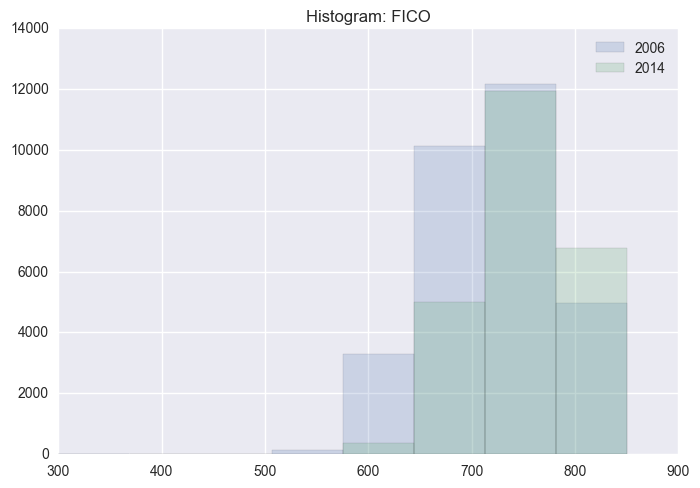

In [22]:
# we plot some of these features to see the distribution:  
plt.hist(orig_subset[orig_subset['orig_yr']==2006]['fico'],bins=8,range=(300,850),alpha=0.2, label='2006')
plt.hist(orig_subset[orig_subset['orig_yr']==2014]['fico'],bins=8,range=(300,850),alpha=0.2, label='2014')
plt.legend(loc='best')
plt.title('Histogram: FICO');

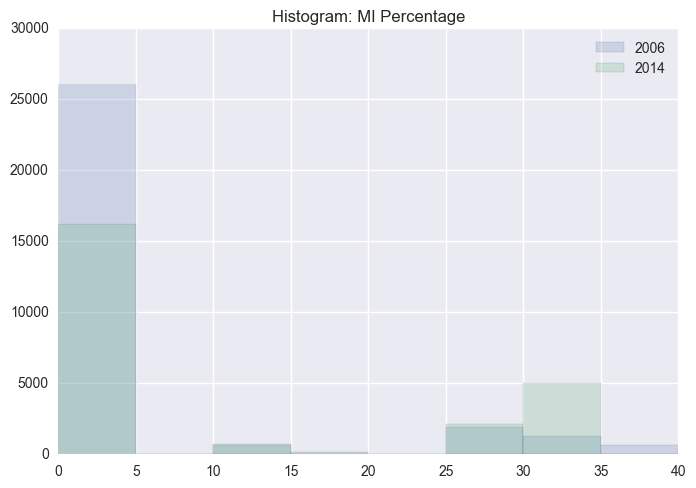

In [23]:
plt.hist(orig_subset[orig_subset['orig_yr']==2006]['mi_pct'],bins=8,range=(0,40),alpha=0.2, label='2006')
plt.hist(orig_subset[orig_subset['orig_yr']==2014]['mi_pct'],bins=8,range=(0,40),alpha=0.2, label='2014')
plt.legend(loc='best')
plt.title('Histogram: MI Percentage');

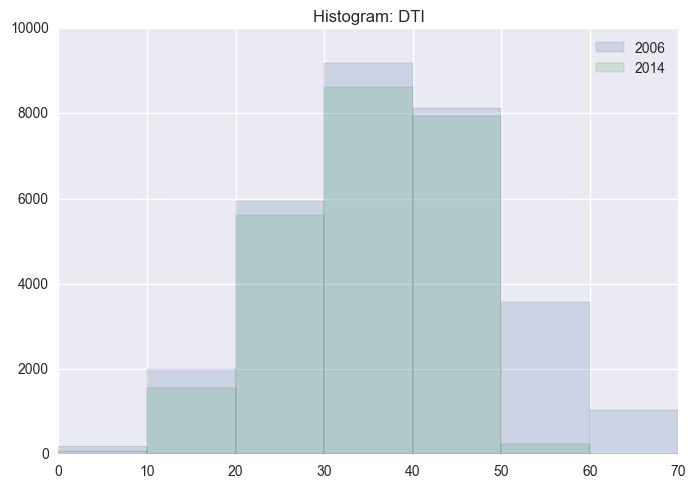

In [24]:
plt.hist(orig_subset[orig_subset['orig_yr']==2006]['dti'],bins=7,range=(0,70),alpha=0.2, label='2006')
plt.hist(orig_subset[orig_subset['orig_yr']==2014]['dti'],bins=7,range=(0,70),alpha=0.2, label='2014')
plt.legend(loc='best')
plt.title('Histogram: DTI');

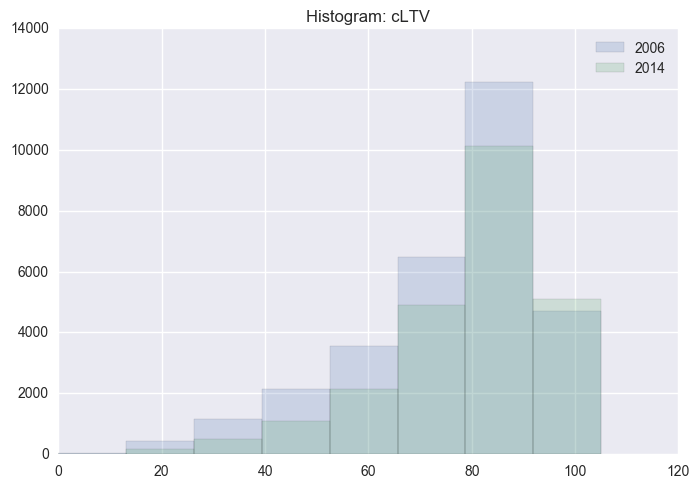

In [25]:
plt.hist(orig_subset[orig_subset['orig_yr']==2006]['cltv'],bins=8,range=(0,105),alpha=0.2, label='2006')
plt.hist(orig_subset[orig_subset['orig_yr']==2014]['cltv'],bins=8,range=(0,105),alpha=0.2, label='2014')
plt.legend(loc='best')
plt.title('Histogram: cLTV');

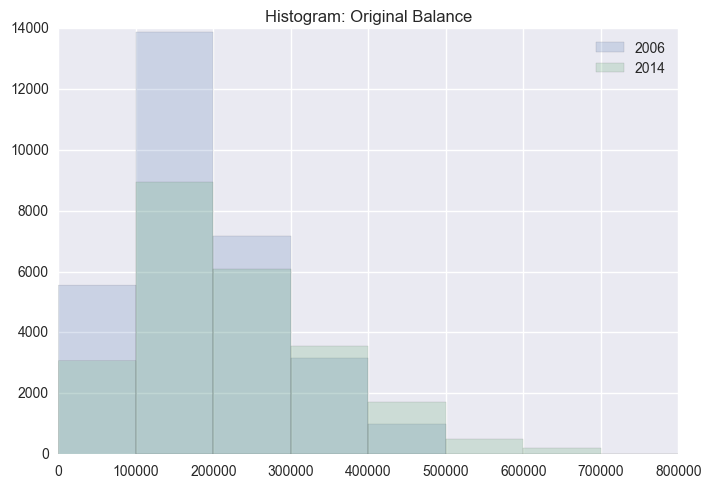

In [26]:
plt.hist(orig_subset[orig_subset['orig_yr']==2006]['orig_bal'],bins=8,range=(0,800000),alpha=0.2, label='2006')
plt.hist(orig_subset[orig_subset['orig_yr']==2014]['orig_bal'],bins=8,range=(0,800000),alpha=0.2, label='2014')
plt.legend(loc='best')
plt.title('Histogram: Original Balance');

### Next steps:  

1) look at the patterns expressed by categorical variables (may need to convert these to dummy variables)

2) Perform clustering analysis